# Descricao e exploração dos dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv( "..\\2_1_coleta_de_dados\\Datasets_coletados\\TRT4\\TRT4_inteiro_teor_2017_2018_2019_amostra.csv", encoding='utf-8' )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29893 entries, 0 to 29892
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LINK          29892 non-null  object
 1   INTEIRO_TEOR  29893 non-null  object
dtypes: object(2)
memory usage: 467.2+ KB


### Conferindo datasets carregados

In [3]:
#aumenta o tamanho de exibição para poder ler o texto do dispositivo do acórdão
pd.set_option('display.max_colwidth', 100000)
pd.set_option('display.max_rows', 10)

In [4]:
df.sample(3, random_state=1)

Acórdão: 0020315-44.2018.5.04.0402 ( RORSum )   Redator: RAUL ZORATTO SANVICENTE    Órgão julgador:  6ª Turma    Data:  20/02/2019          PODER JUDICIÁRIO   JUSTIÇA DO TRABALHO   TRIBUNAL REGIONAL DO TRABALHO DA 4ª REGIÃO   6ª Turma             Identificação        PROCESSO nº 0020315-44.2018.5.04.0402 (ROPS) RECORRENTE: MARCOPOLO SA RECORRIDO: MARCIA DE FATIMA COLLA RELATOR: RAUL ZORATTO SANVICENTE                        CERTIDÃO DE JULGAMENTO        Vistos, relatados e discutidos os autos.  ACORDAM os Magistrados integrantes da 6ª Turma do Tribunal Regional do Trabalho da 4ª Região: preliminarmente, por unanimidade, REJEITAR A PREFACIAL SUSCITADA PELA RECLAMADA de nulidade da sentença na parte em que tornada líquida. No mérito, NEGAR PROVIMENTO AO RECURSO ORDINÁRIO DA RECLAMADA , confirmando a sentença por seus próprios fundamentos e por aqueles acrescidos na presente decisão, a teor do disposto no inciso IV do parágrafo 1º do art. 895 da CLT. Custas inalteradas para os fins legais.  Intime-se.  Porto Alegre, 20 de fevereiro de 2019 (quarta-feira).          Cabeçalho do acórdão               Acórdão                                 RAZÕES DE DECIDIR. RECURSO ORDINÁRIO DA RECLAMADA. PRELIMINARMENTE. SUPRESSÃO DA FASE DE LIQUIDAÇÃO DE SENTENÇA. NULIDADE DA DECISÃO . Busca a ré seja declarada nula a sentença tornada líquida pelo Julgador de origem, alegando que os cálculos apresentados afrontam o disposto no art. 879 da CLT, uma vez que segundo o § 1º-B do citado artigo de lei as partes deverão ser previamente intimadas para a apresentação do cálculo de liquidação, o que não ocorreu no presente caso. Ressalta a recorrente que sequer deu justa causa para a elaboração dos cálculos de liquidação e que as partes possuem interesse em elaborar os devidos cálculos, porém em momento oportuno para a sua apresentação. Em razão da violação ao princípio do devido processo legal (art. 5º, inciso LV, da CF) e ao art. 879 da CLT, requer seja declarada nula a sentença, rechaçando-se os cálculos de liquidação anexados à decisão, ofertando a possibilidade de apresentação em momento oportuno. Aprecio . Ao contrário do alegado pela recorrente, não existe óbice à prolatação de sentenças líquidas no processo do trabalho. Ao contrário, a prolação da sentença líquida é amparada pela norma do invocado art. 789 da CLT e pelos princípios da celeridade e da razoável duração do processo. Destaco que o princípio da celeridade processual de que trata o art. 5º, LXXVIII, da Carta Constitucional autoriza o Juiz a proferir sentença líquida, sem que haja violação ao contraditório e à ampla defesa, previstos no inciso LV do art. 5º citado. No caso, o próprio Magistrado liquidou a sentença, apresentando com elas seus cálculos de liquidação sem nomear perito auxiliar, o que impõe afastar a alegação patronal de que há ofensa ao devido processo legal (art. 5º, LV, da Carta Maior) porque as partes poderiam concordar com os cálculos reciprocamente apresentados, eliminando a necessidade de nomeação de perito. Noto que a reclamada postula a nulidade da decisão e requer sejam rechaçados os cálculos de liquidação, mas não ataca especificamente aqueles apurados pelo Magistrado para cada parcela deferida, seja quanto aos valores, seja quanto aos critérios utilizados, nada havendo a prover no particular. Assim, tomada como regular a sentença em debate, cabe registrar que embora o provimento do recurso ordinário articulado por alguma das partes litigantes seja circunstância natural e corriqueira, no caso em tela a decisão se mantém inalterada na fase de liquidação, diante da ausência de reforma da sentença, uma vez que indeferidos os itens apresentados em seus recurso ordinário em análise. Descabe falar, portanto, em violação do devido processo legal, inexistindo motivo para remeter-se a apuração dos valores objeto da condenação à fase de liquidação de sentença, na forma do art. 879 da CLT. MÉRITO. BENEFÍCIO DA JUSTIÇA GRATUITA E HONORÁRIOS SUCUMBENCIAIS. LEI 13.467/2017. O J

### Preparação dos dados

In [5]:
df['NUM_CARACTERES'] = df['INTEIRO_TEOR'].astype(str).apply(len)
df['NUM_PALAVRAS'] = df['INTEIRO_TEOR'].apply(lambda x: len(str(x).split()))
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29893 entries, 0 to 29892
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   LINK            29892 non-null  object
 1   INTEIRO_TEOR    29893 non-null  object
 2   NUM_CARACTERES  29893 non-null  int64 
 3   NUM_PALAVRAS    29893 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 934.3+ KB


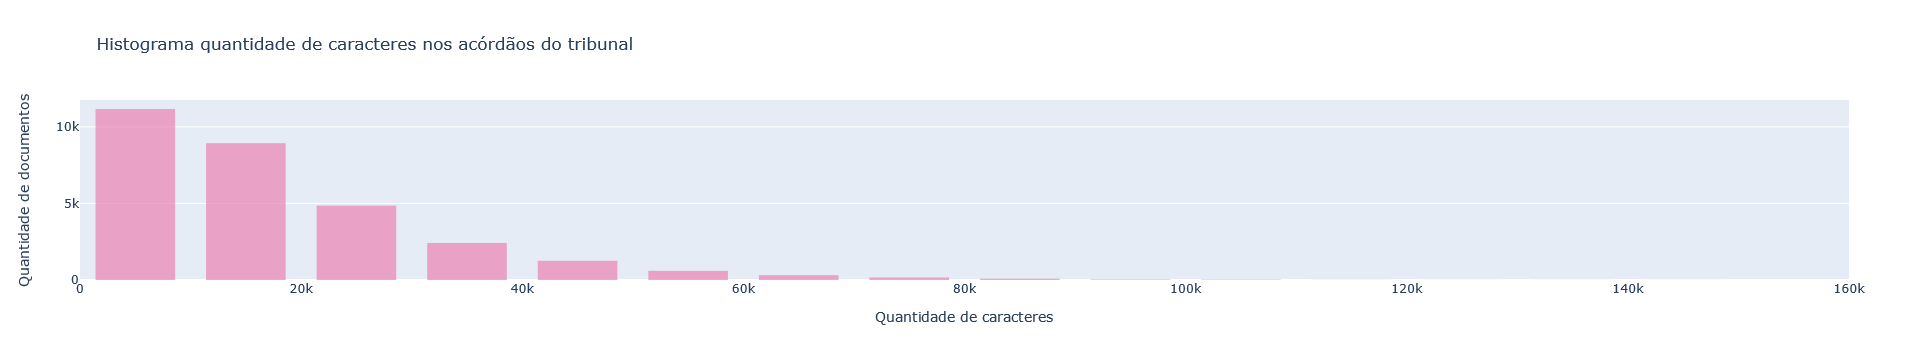

In [6]:
import plotly.graph_objects as go

fig = go.Figure( )

fig.add_trace(go.Histogram(
    x=df["NUM_CARACTERES"],
    name="TRT 3ª Região",
    marker_color='#EB89B5',
    nbinsx=25 ))

# Overlay both histograms
fig.update_layout(
    title='Histograma quantidade de caracteres nos acórdãos do tribunal',
    xaxis_title_text='Quantidade de caracteres',
    yaxis_title_text='Quantidade de documentos',
    bargap=0.2,
    bargroupgap=0.1
    )
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

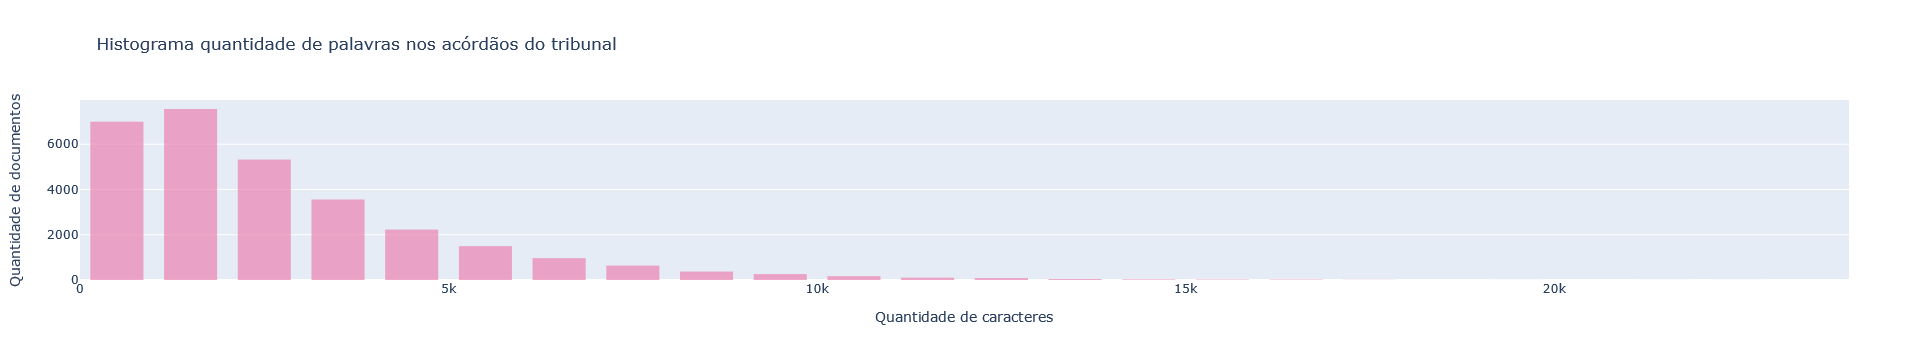

In [7]:
import plotly.graph_objects as go

fig = go.Figure( )

fig.add_trace(go.Histogram(
    x=df["NUM_PALAVRAS"],
    name="TRT 3ª Região",
    marker_color='#EB89B5',
    nbinsx=25 ))

# Overlay both histograms
fig.update_layout(
    title='Histograma quantidade de palavras nos acórdãos do tribunal',
    xaxis_title_text='Quantidade de caracteres',
    yaxis_title_text='Quantidade de documentos',
    bargap=0.2,
    bargroupgap=0.1
    )
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [8]:
df.describe()

,NUM_CARACTERES,NUM_PALAVRAS
count,29893.000000,29893.000000
mean,17926.647911,2738.166828
std,15071.879065,2357.615909
min,3.000000,0.000000
25%,7137.000000,1051.000000
50%,13639.000000,2065.000000
75%,23805.000000,3654.000000
max,151415.000000,23391.000000


## Visualiza documentos com poucas palavras

#### É possível observar que há documentos OK em amostras com até 200 palavras

In [9]:
df.loc[ df["NUM_PALAVRAS"] < 200, "INTEIRO_TEOR" ]

56                                                                                                                                                     Acórdão: 0020484-24.2018.5.04.0372 ( RORSum )   Redator: ALEXANDRE CORREA DA CRUZ    Órgão julgador:  3ª Turma    Data:  18/03/2019          PODER JUDICIÁRIO   JUSTIÇA DO TRABALHO   TRIBUNAL REGIONAL DO TRABALHO DA 4ª REGIÃO              Identificação       PROCESSO nº 0020484-24.2018.5.04.0372 (ROPS) RECORRENTE: VERCELLI INDUSTRIA E COMERCIO DE CALCADOS EIRELI RECORRIDO: ELISABETE RODRIGUES MACHADO RELATOR: ALEXANDRE CORREA DA CRUZ          EMENTA                   ACÓRDÃO         Vistos, relatados e discutidos os autos.  ACORDAM os Magistrados integrantes da 3ª Turma do Tribunal Regional do Trabalho da 4ª Região: por unanimidade de votos, negar provimento ao recurso ordinário da reclamada, mantendo a sentença recorrida, por seus jurídicos e legais fundamentos, nos termos do art. 895, parágrafo primeiro, inciso IV, "in fine", da CLT, co

#### É possível observar que abaixo de 150 palavras há documentos incorretos, ou seja, fora dos padrões de qualidade

In [10]:
df.loc[ df["NUM_PALAVRAS"] < 150, "INTEIRO_TEOR" ]

126                                           Acórdão: 0020073-52.2019.5.04.0531 ( RORSum )   Redator: GILBERTO SOUZA DOS SANTOS    Órgão julgador:  8ª Turma    Data:  26/08/2019          PODER JUDICIÁRIO   JUSTIÇA DO TRABALHO   TRIBUNAL REGIONAL DO TRABALHO DA 4ª REGIÃO              Identificação       PROCESSO nº 0020073-52.2019.5.04.0531 (ROPS) RECORRENTE: ANA CARINA RODRIGUES DE RODRIGUES RECORRIDO: CENTRO DE RECREACAO & APRENDIZAGEM BEM-ME-QUER LTDA - ME RELATOR: GILBERTO SOUZA DOS SANTOS          EMENTA                   ACÓRDÃO         Vistos, relatados e discutidos os autos.  ACORDAM os Magistrados integrantes da 8ª Turma do Tribunal Regional do Trabalho da 4ª Região: por unanimidade, NEGAR PROVIMENTO AO RECURSO DA AUTORA , para manter a sentença por seu próprios fundamentos, na forma do art. 895, IV, da CLT.  Intime-se.  Porto Alegre, 07 de agosto de 2019 (quarta-feira).          Cabeçalho do acórdão               Acórdão               RELATÓRIO         É o relatório.         

### Limpeza dos documentos incorretos

In [11]:
df = df.loc[ df["NUM_PALAVRAS"] > 150, : ]

## Descrição dos dados coletados após limpeza

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29629 entries, 0 to 29892
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   LINK            29629 non-null  object
 1   INTEIRO_TEOR    29629 non-null  object
 2   NUM_CARACTERES  29629 non-null  int64 
 3   NUM_PALAVRAS    29629 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [13]:
df.describe()

,NUM_CARACTERES,NUM_PALAVRAS
count,29629.000000,29629.000000
mean,18075.820615,2761.346316
std,15055.421326,2355.215204
min,1183.000000,151.000000
25%,7265.000000,1073.000000
50%,13783.000000,2086.000000
75%,23958.000000,3677.000000
max,151415.000000,23391.000000


## Distribuição dos unigramas mais usadas antes de remover stop words

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from plotly.offline import iplot

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['INTEIRO_TEOR'], 20)
df1 = pd.DataFrame(common_words, columns = ['INTEIRO_TEOR' , 'QUANTIDADE'])
df1

,INTEIRO_TEOR,QUANTIDADE
0,de,4065528
1,do,2219509
2,da,2175871
3,que,2004688
4,em,1173910
...,...,...
15,reclamante,449824
16,as,405082
17,dos,399166
18,das,331502


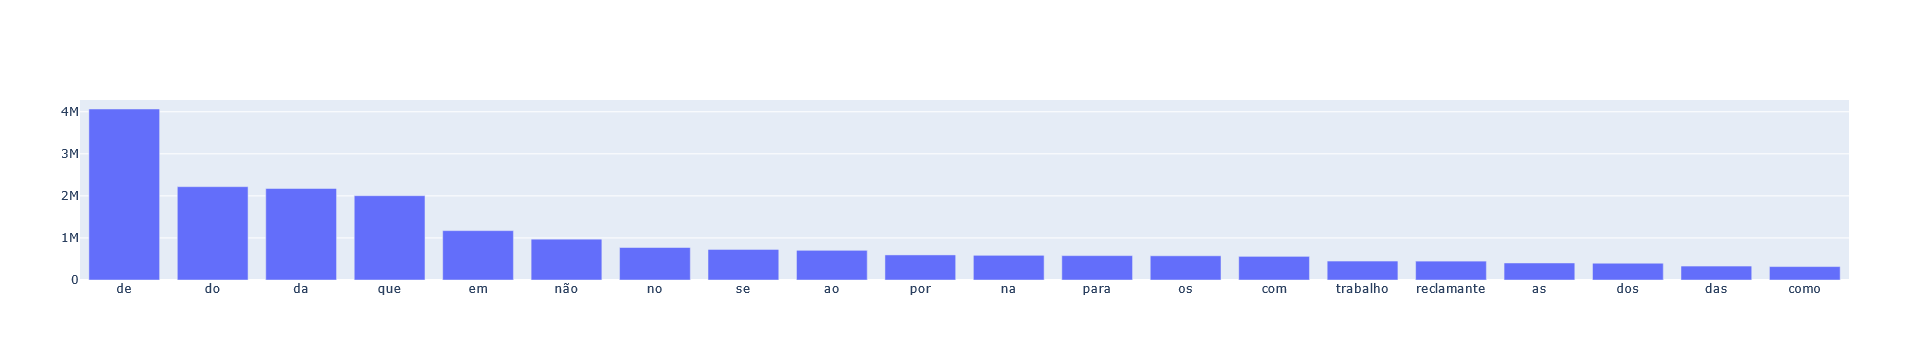

In [15]:
trace = go.Bar(x=df1["INTEIRO_TEOR"], y=df1["QUANTIDADE"])
iplot({"data":[trace]})

## Distribuição dos unigramas mais usadas depois de remover stop words

In [16]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rhuan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

In [17]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer( stop_words = frozenset( stopwords ) ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['INTEIRO_TEOR'], 30)
df2 = pd.DataFrame(common_words, columns = ['INTEIRO_TEOR' , 'QUANTIDADE'])
df2

,INTEIRO_TEOR,QUANTIDADE
0,trabalho,451463
1,reclamante,449824
2,reclamada,303815
3,art,295991
4,horas,277982
...,...,...
25,tribunal,132903
26,adicional,132832
27,valor,131606
28,jornada,130797


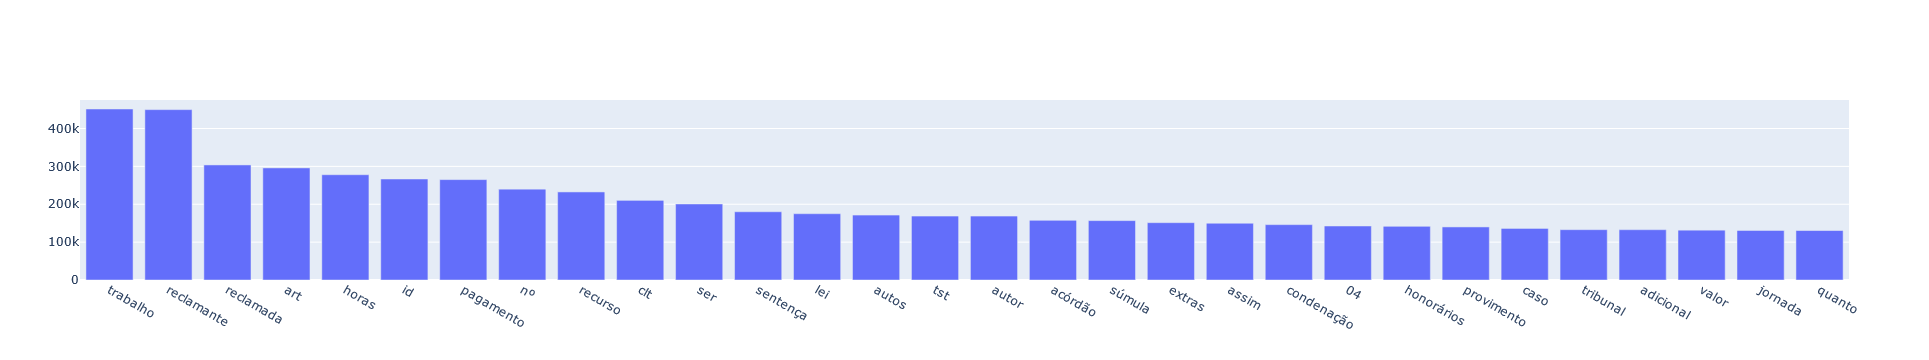

In [18]:
trace = go.Bar(x=df2["INTEIRO_TEOR"], y=df2["QUANTIDADE"])
iplot({"data":[trace]})

## Distribuição dos bigramas mais usadas antes de remover stop words

In [19]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['INTEIRO_TEOR'], 30)
df3 = pd.DataFrame(common_words, columns = ['INTEIRO_TEOR' , 'QUANTIDADE'])
df3

,INTEIRO_TEOR,QUANTIDADE
0,do trabalho,203569
1,da clt,201427
2,de trabalho,187254
3,do tst,150686
4,que não,147554
...,...,...
25,que reclamante,69363
26,nos termos,69320
27,trabalho da,67680
28,tribunal regional,66554


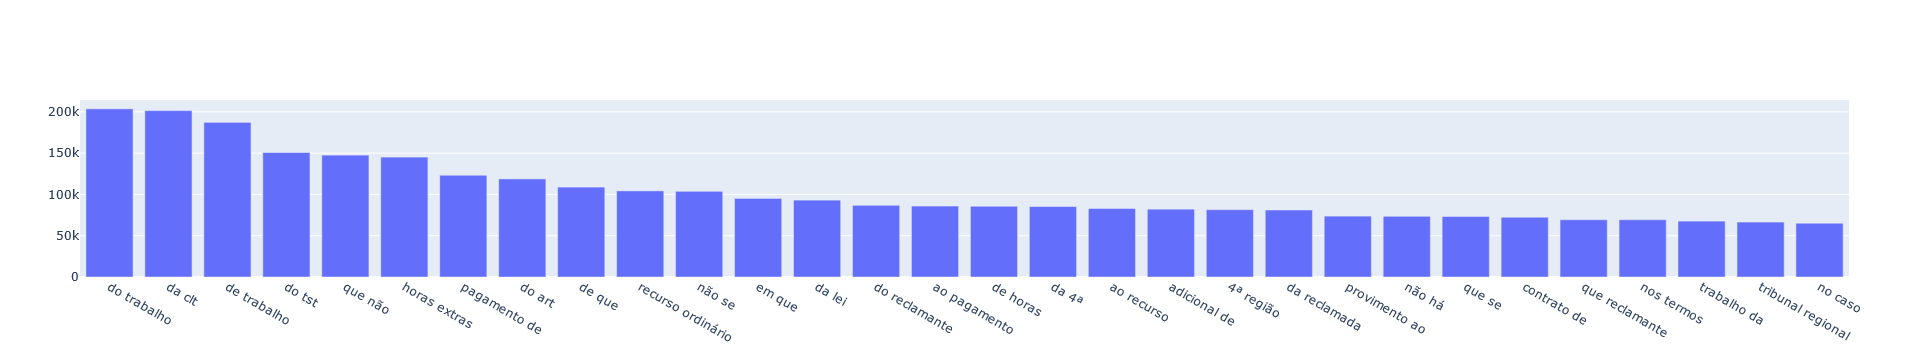

In [20]:
trace = go.Bar(x=df3["INTEIRO_TEOR"], y=df3["QUANTIDADE"])
iplot({"data":[trace]})

## Distribuição dos bigramas mais usadas depois de remover stop words

In [21]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer( stop_words = frozenset( stopwords ), ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['INTEIRO_TEOR'], 30)
df4 = pd.DataFrame(common_words, columns = ['INTEIRO_TEOR' , 'QUANTIDADE'])
df4

,INTEIRO_TEOR,QUANTIDADE
0,horas extras,145643
1,recurso ordinário,104305
2,4ª região,81540
3,provimento recurso,69939
4,tribunal regional,66555
...,...,...
25,intervalo intrajornada,31357
26,000 00,31306
27,poder judiciário,30824
28,órgão julgador,30690


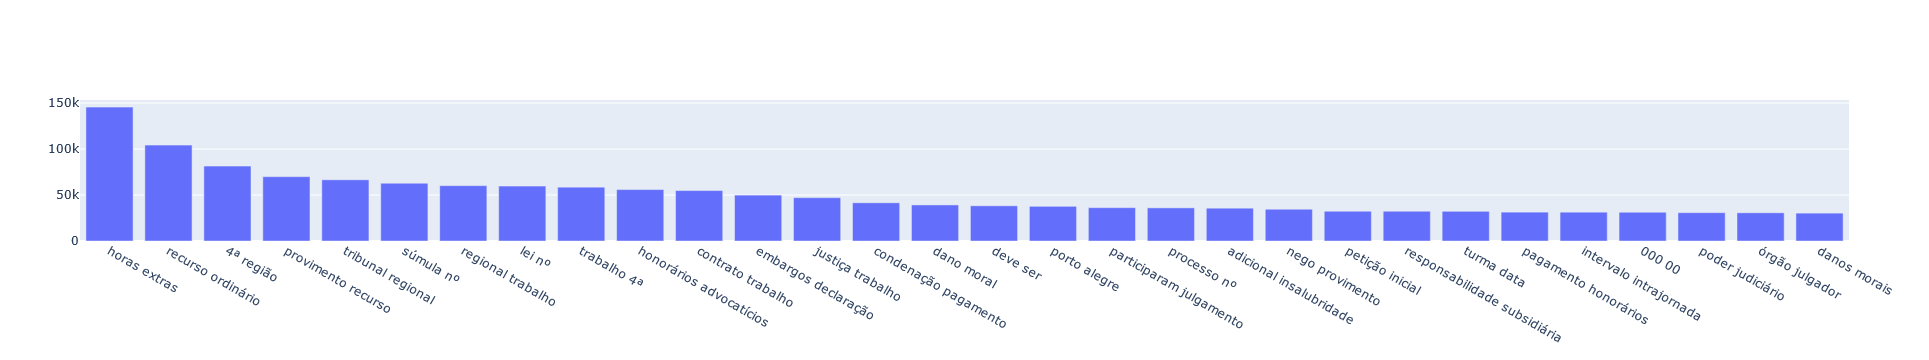

In [22]:
trace = go.Bar(x=df4["INTEIRO_TEOR"], y=df4["QUANTIDADE"])
iplot({"data":[trace]})

## Distribuição dos trigramas mais usadas antes de remover stop words

In [23]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['INTEIRO_TEOR'], 20)
df5 = pd.DataFrame(common_words, columns = ['INTEIRO_TEOR' , 'QUANTIDADE'])
df5

,INTEIRO_TEOR,QUANTIDADE
0,da 4ª região,80653
1,provimento ao recurso,65354
2,do trabalho da,60769
3,regional do trabalho,60178
4,tribunal regional do,59490
...,...,...
15,da lei nº,35653
16,adicional de insalubridade,35611
17,do contrato de,33117
18,recurso ordinário do,30854


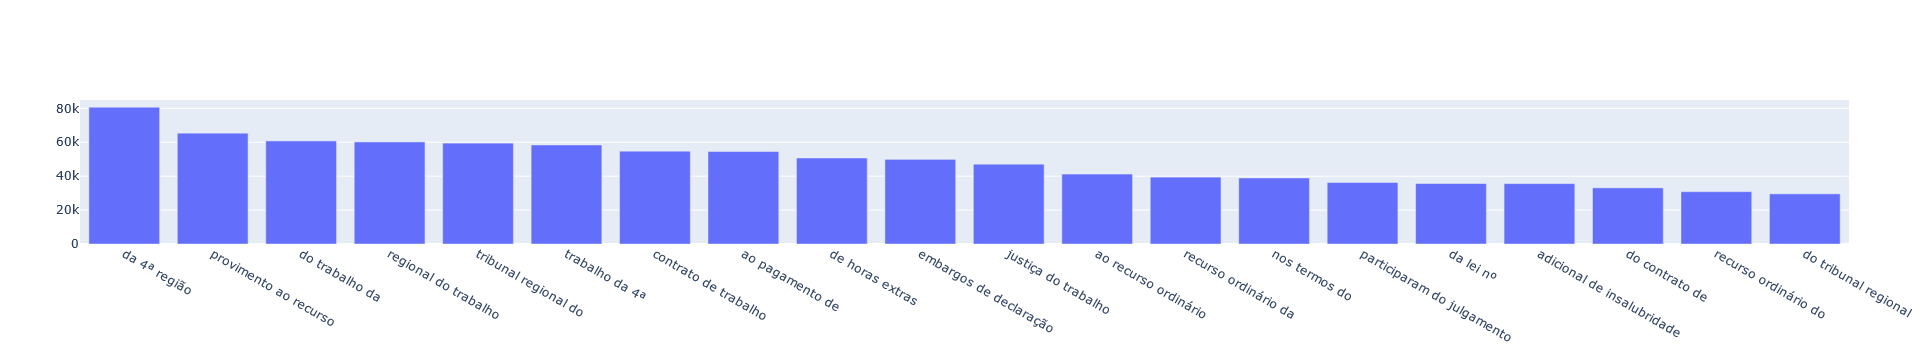

In [24]:
trace = go.Bar(x=df5["INTEIRO_TEOR"], y=df5["QUANTIDADE"])
iplot({"data":[trace]})

## Distribuição dos trigramas mais usadas depois de remover stop words

In [25]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer( stop_words = frozenset( stopwords ), ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['INTEIRO_TEOR'], 20)
df6 = pd.DataFrame(common_words, columns = ['INTEIRO_TEOR' , 'QUANTIDADE'])
df6

,INTEIRO_TEOR,QUANTIDADE
0,tribunal regional trabalho,59482
1,trabalho 4ª região,58403
2,regional trabalho 4ª,58033
3,provimento recurso ordinário,33822
4,recurso ordinário reclamante,29893
...,...,...
15,feira cabeçalho acórdão,28290
16,cabeçalho acórdão acórdão,28281
17,identificação processo nº,28242
18,acórdão acórdão relatório,28226


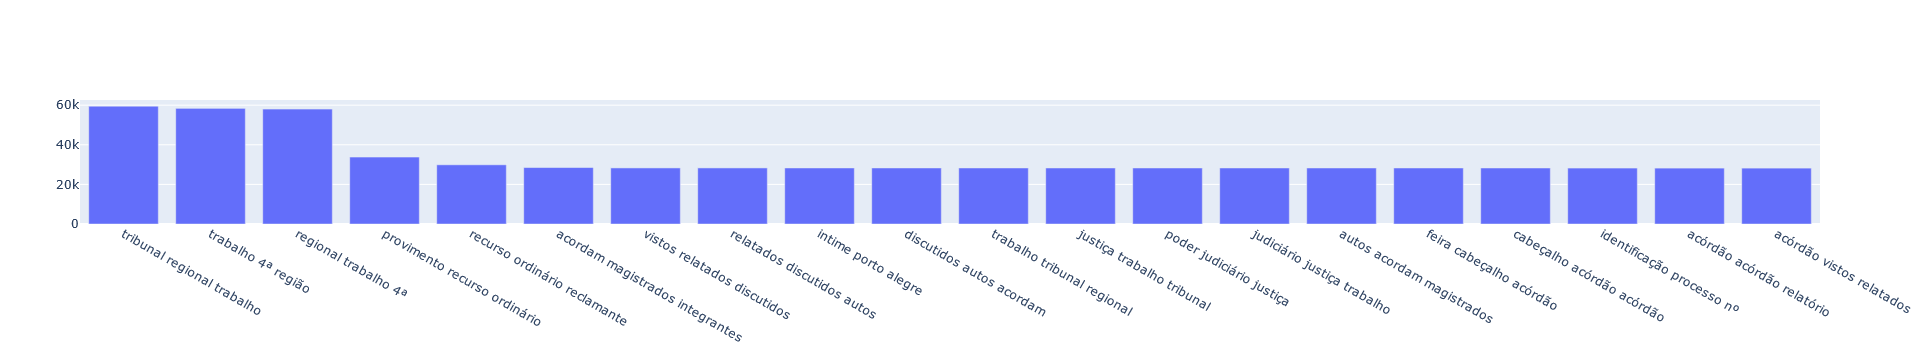

In [26]:
trace = go.Bar(x=df6["INTEIRO_TEOR"], y=df6["QUANTIDADE"])
iplot({"data":[trace]})